# SHOW DISTRIBUTION OF RGB VALUES PER PH LEVEL

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Automated Generation of Distribution Plots


In [2]:
bins = 255*2
alpha = 0.4
dataDir = "noBgData"
savePath = "distributionPlots"
classDirs = [os.path.join(dataDir, c) for c in os.listdir(dataDir)]
paths = [os.path.join(classDir,image) for classDir in classDirs for image in os.listdir(classDir)]

## PER LIST WILL BE 3 CHANNELS

rgb_ph6 = []
rgb_ph7 = []
rgb_ph8 = []
rgb_ph9 = []

if os.path.exists(savePath) == False: os.mkdir(savePath)

for n,path in enumerate(paths):
    if (n%100 == 0) and (n != 0) or (n == len(paths)-1): print("Doing image# ", n)

    ## READING IMAGE
    c = path.split("\\")[1]
    image = cv2.imread(path)
    colorProcessedImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ## GETTING RGB VALUES
    red_values = np.array(colorProcessedImage[::,::,0])
    red_values = red_values.reshape(1,-1)[0]
    green_values = np.array(colorProcessedImage[::,::,1])
    green_values = green_values.reshape(1,-1)[0]
    blue_values = np.array(colorProcessedImage[::,::,2])
    blue_values = blue_values.reshape(1,-1)[0]

    ## APPENDING TO FINAL LISTS
    ## SHAPE = (IMAGE,(RED,GREEN,BLUE))
    if c == "6" : rgb_ph6.append([red_values,green_values,blue_values])
    elif c == "7" : rgb_ph7.append([red_values,green_values,blue_values])
    elif c == "8" : rgb_ph8.append([red_values,green_values,blue_values])
    elif c == "9" : rgb_ph9.append([red_values,green_values,blue_values])




Doing image#  100
Doing image#  200
Doing image#  300
Doing image#  400
Doing image#  500
Doing image#  600
Doing image#  700
Doing image#  800
Doing image#  900
Doing image#  1000
Doing image#  1048


In [3]:
rgb_ph6 = np.array(rgb_ph6)
rgb_ph7 = np.array(rgb_ph7)
rgb_ph8 = np.array(rgb_ph8)
rgb_ph9 = np.array(rgb_ph9)

np.random.shuffle(rgb_ph6)
np.random.shuffle(rgb_ph7)
np.random.shuffle(rgb_ph8)
np.random.shuffle(rgb_ph9)

rgb_ph6 = rgb_ph6[:160]
rgb_ph7 = rgb_ph7[:160]
rgb_ph8 = rgb_ph8[:160]
rgb_ph9 = rgb_ph9[:160]

print(rgb_ph6.shape)
print(rgb_ph7.shape)
print(rgb_ph8.shape)
print(rgb_ph9.shape)

(160, 3, 50176)
(160, 3, 50176)
(160, 3, 50176)
(160, 3, 50176)


In [4]:
def get_zscore(channel_values):
    ## INPUT LIST OF RAW SINGLE CHANNEL VALUES
    ## OUTPUT ZSCORE LIST
    channel_mean = np.mean(channel_values)
    channel_std = np.std(channel_values)
    zscore_ph6_red_values = [(score-channel_mean)/channel_std for score in channel_values if score > 5]
    return zscore_ph6_red_values

def get_channel_values(rgb_values, channel):
    ## FOR CHANNEL
    ## 0 == RED
    ## 1 == GREEN
    ## 2 == BLUE
    channel_values = rgb_values[:,channel,:].reshape(1,-1)[0]
    return channel_values

def plot_distribution(ph6, ph7, ph8, ph9, name, bins = bins, alpha = alpha, savePath=savePath):
    ## DISPLAYS DISTRIBUTION CHANNEL USING HISTOGRAM

    plt.figure(figsize=(15,5))
    plt.xticks(ticks=[-3,-2,-1,0,1,2,3])
    plt.axis(xmin=-3, xmax=3)
    plt.title(f'Distribution {name}', loc='center')

    plt.hist(ph6, bins=bins, color = "red", alpha = alpha)
    plt.hist(ph7, bins=bins, color = "green", alpha = alpha)
    plt.hist(ph8, bins=bins, color = "blue", alpha = alpha)
    plt.hist(ph9, bins=bins, color = "orange", alpha = alpha)

    #### SHOW AND SAVE PLOT
    plt.legend(["pH6", "pH7", "pH8", "pH9"])
    plt.savefig(os.path.join(savePath,f'{name}.png'))
    plt.show()

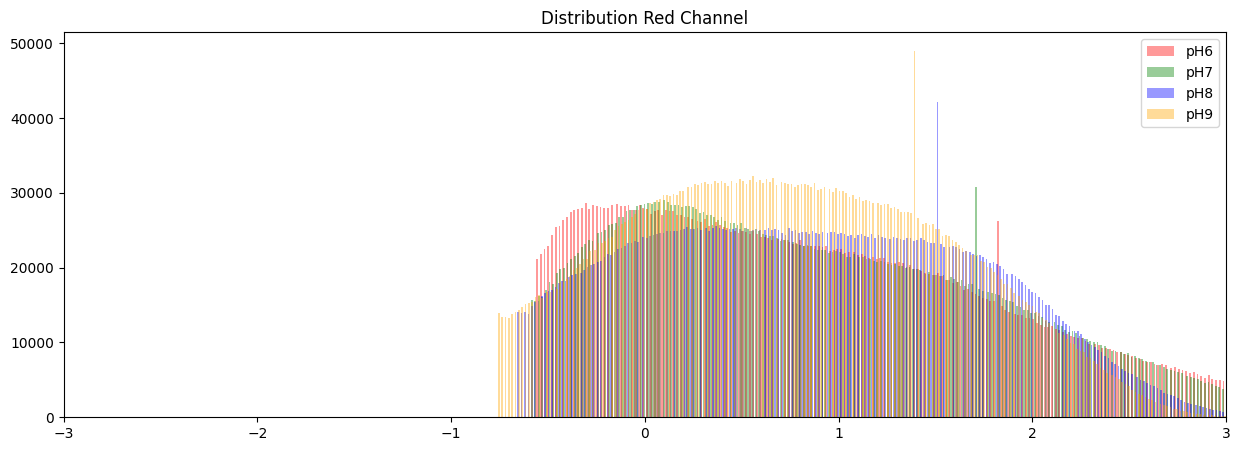

In [5]:
## GETTING ZSCORES
## RED
ph6_red = get_channel_values(rgb_ph6,0)
zscore_ph6_red = get_zscore(ph6_red)

ph7_red = get_channel_values(rgb_ph7,0)
zscore_ph7_red = get_zscore(ph7_red)

ph8_red = get_channel_values(rgb_ph8,0)
zscore_ph8_red = get_zscore(ph8_red)

ph9_red = get_channel_values(rgb_ph9,0)
zscore_ph9_red = get_zscore(ph9_red)

## PLOTTTING ZSCORES
plot_distribution(zscore_ph6_red, zscore_ph7_red, zscore_ph8_red, zscore_ph9_red, name = "Red Channel")


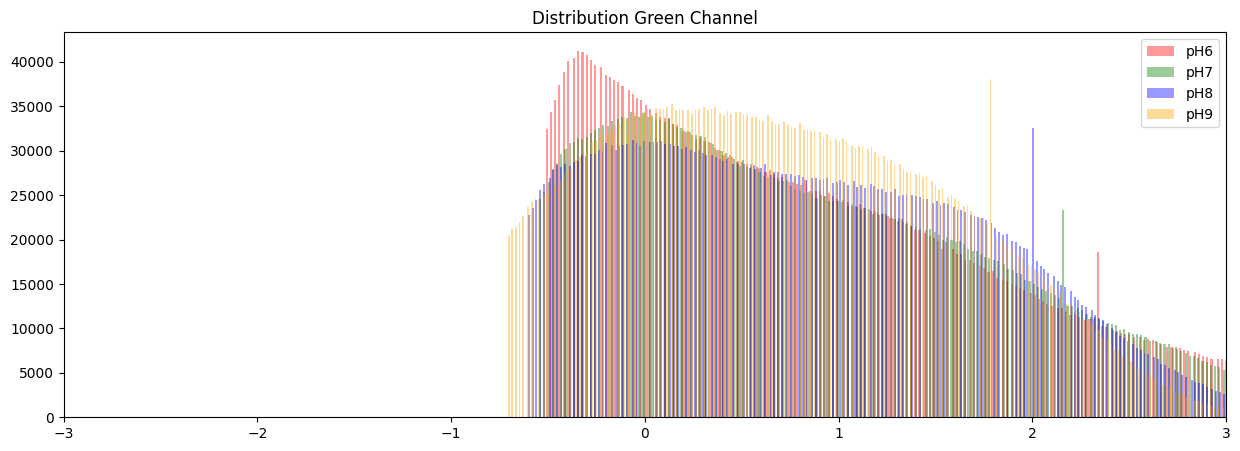

In [6]:
## GETTING ZSCORES
## GREEN
ph6_green = get_channel_values(rgb_ph6,1)
zscore_ph6_green = get_zscore(ph6_green)

ph7_green = get_channel_values(rgb_ph7,1)
zscore_ph7_green = get_zscore(ph7_green)

ph8_green = get_channel_values(rgb_ph8,1)
zscore_ph8_green = get_zscore(ph8_green)

ph9_green = get_channel_values(rgb_ph9,1)
zscore_ph9_green = get_zscore(ph9_green)

## PLOTTTING ZSCORES
plot_distribution(zscore_ph6_green, zscore_ph7_green, zscore_ph8_green, zscore_ph9_green, name = "Green Channel")


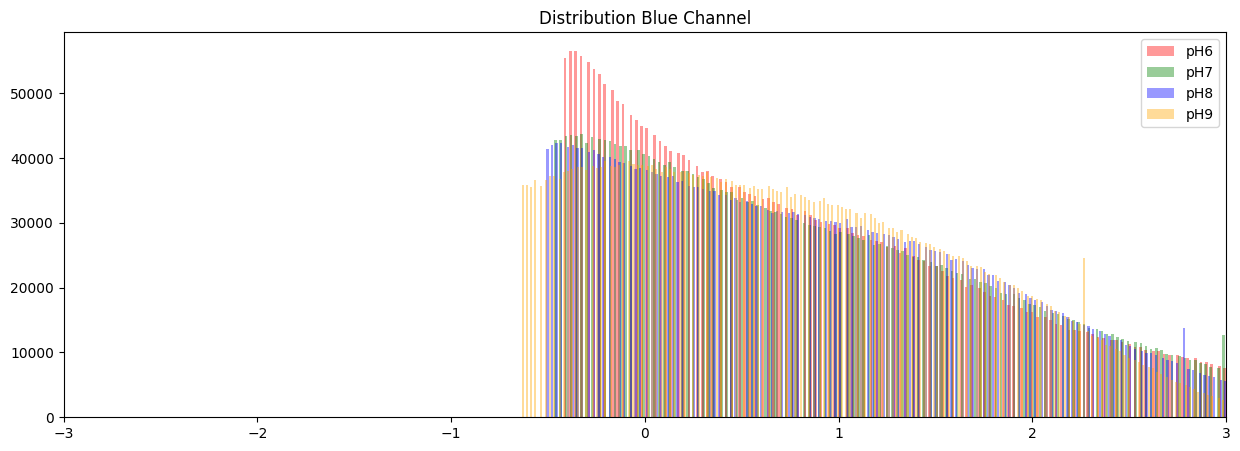

In [7]:
## GETTING ZSCORES
## BLUE
ph6_blue = get_channel_values(rgb_ph6,2)
zscore_ph6_blue = get_zscore(ph6_blue)

ph7_blue = get_channel_values(rgb_ph7,2)
zscore_ph7_blue = get_zscore(ph7_blue)

ph8_blue = get_channel_values(rgb_ph8,2)
zscore_ph8_blue = get_zscore(ph8_blue)

ph9_blue = get_channel_values(rgb_ph9,2)
zscore_ph9_blue = get_zscore(ph9_blue)

## PLOTTTING ZSCORES
plot_distribution(zscore_ph6_blue, zscore_ph7_blue, zscore_ph8_blue, zscore_ph9_blue, name = "Blue Channel")


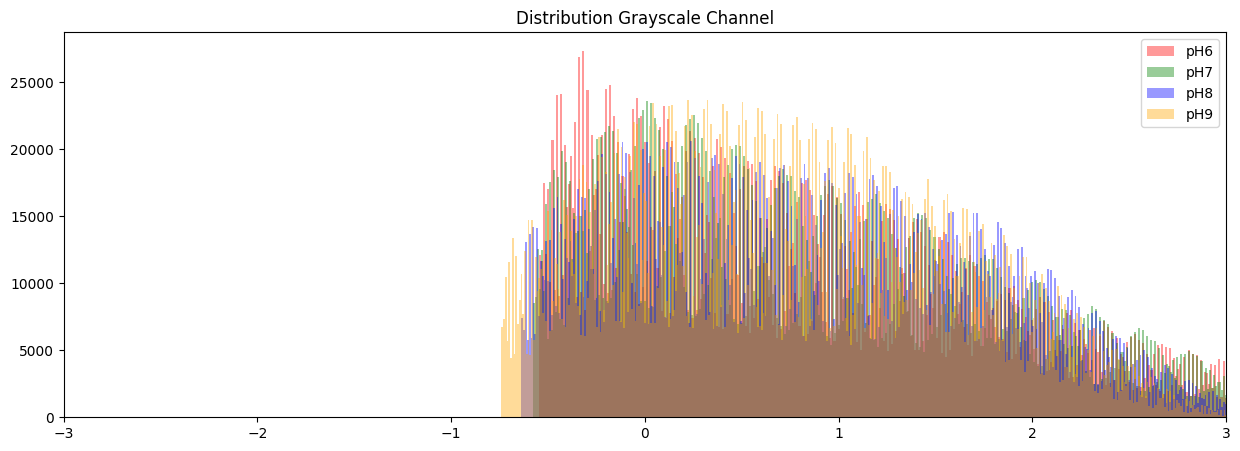

In [8]:
## GETTING ZSCORES
## GRAYSCALE 0.299 ∙ Red + 0.587 ∙ Green + 0.114
ph6_ave = (0.299*ph6_red) + (0.587*ph6_green) + (0.114*ph6_blue)
zscore_ph6_ave = get_zscore(ph6_ave)

ph7_ave = (0.299*ph7_red) + (0.587*ph7_green) + (0.114*ph7_blue)
zscore_ph7_ave = get_zscore(ph7_ave)

ph8_ave = (0.299*ph8_red) + (0.587*ph8_green) + (0.114*ph8_blue)
zscore_ph8_ave = get_zscore(ph8_ave)

ph9_ave = (0.299*ph9_red) + (0.587*ph9_green) + (0.114*ph9_blue)
zscore_ph9_ave = get_zscore(ph9_ave)


## PLOTTTING ZSCORES
plot_distribution(zscore_ph6_ave, zscore_ph7_ave, zscore_ph8_ave, zscore_ph9_ave, name = "Grayscale Channel")

# MANUAL DISPLAY OF DISTRIBUTION PLOTS

In [9]:
filepath_6 = "noBgData//6//6F--1-_png.rf.72ba05da0820fb5959d693317f5c7217.png"
filepath_7 = "noBgData//7//7F--1-_png.rf.049eb9dc8199d7115b3af9831c127453.png"
filepath_8 = "noBgData//8//8F--39-_png.rf.f0c95dcba8b25cad007a818c73ab057c.png"
filepath_9 = "noBgData//9//9F--1-_png.rf.77a57ae1ba6b879f85e4836e33ef807f.png"

In [10]:
image_6 = cv2.imread(filepath_6)
image_7 = cv2.imread(filepath_7)
image_8 = cv2.imread(filepath_8)
image_9 = cv2.imread(filepath_9)

colorProcessedImage_6 = cv2.cvtColor(image_6, cv2.COLOR_BGR2RGB)
colorProcessedImage_7 = cv2.cvtColor(image_7, cv2.COLOR_BGR2RGB)
colorProcessedImage_8 = cv2.cvtColor(image_8, cv2.COLOR_BGR2RGB)
colorProcessedImage_9 = cv2.cvtColor(image_9, cv2.COLOR_BGR2RGB)

error: OpenCV(3.4.18) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
plt.imshow(colorProcessedImage_6)
plt.title('pH6')
plt.show()

plt.imshow(colorProcessedImage_7)
plt.title('pH7')
plt.show()

plt.imshow(colorProcessedImage_8)
plt.title('pH8')
plt.show()

plt.imshow(colorProcessedImage_9)
plt.title('pH9')
plt.show()

## Getting RGB Values

### RED

In [ ]:
red_values = np.array(colorProcessedImage_6[::,::,0])
red_values = red_values.reshape(1,-1)[0]
red_values

### BLUE

In [ ]:
blue_values = np.array(colorProcessedImage_6[::,::,1])
blue_values = blue_values.reshape(1,-1)[0]
blue_values

### GREEN

In [ ]:
green_values = np.array(colorProcessedImage_6[::,::,2])
green_values = green_values.reshape(1,-1)[0]
green_values

## Getting Z-score of RGB values

### RED Z-SCORE

In [ ]:
red_mean = np.mean(red_values)
red_std = np.std(red_values)

zscore_red_values = [(score-red_mean)/red_std for score in red_values if score > 0]
zscore_red_values[:5]

### BLUE Z-SCORE

In [ ]:
blue_mean = np.mean(blue_values)
blue_std = np.std(blue_values)

zscore_blue_values = [(score-blue_mean)/blue_std for score in blue_values if score > 0]
zscore_blue_values[:5]

### GREEN Z-SCORE

In [ ]:
green_mean = np.mean(green_values)
green_std = np.std(green_values)

zscore_green_values = [(score-green_mean)/green_std for score in green_values if score > 0]
zscore_green_values[:5]

## Plotting Distribution

### RED Z-SCORE DISTRIBUTION

In [ ]:
## PLOTTTING ZSCORE FREQ
name = "6 red"
plt.figure(figsize=(15,5))
plt.hist(zscore_red_values, bins=200)
plt.xticks(ticks=[-3,-2,-1,0,1,2,3])
plt.axis(xmin=-3, xmax=3)
plt.title(f'name: Z-Score {name}\nmean: {red_mean}\nstd: {red_std}', loc='center')
#### SHOW PLOT
plt.show()

### BLUE Z-SCORE DISTRIBUTION

In [ ]:
## PLOTTTING ZSCORE FREQ
name = "6 blue"
plt.figure(figsize=(15,5))
plt.hist(zscore_blue_values, bins=200)
plt.xticks(ticks=[-3,-2,-1,0,1,2,3])
plt.axis(xmin=-3, xmax=3)
plt.title(f'name: Z-Score {name}\nmean: {blue_mean}\nstd: {blue_std}', loc='center')
#### SHOW PLOT
plt.show()

### GREEN Z-SCORE DISTRIBUTION

In [ ]:
## PLOTTTING ZSCORE FREQ
name = "6 green"
plt.figure(figsize=(15,5))
plt.hist(zscore_green_values, bins=200)
plt.xticks(ticks=[-3,-2,-1,0,1,2,3])
plt.axis(xmin=-3, xmax=3)
plt.title(f'name: Z-Score {name}\nmean: {green_mean}\nstd: {green_std}', loc='center')
#### SHOW PLOT
plt.show()

### OVERLAYED Z-SCORE DISTRIBUTION

In [ ]:
## PLOTTTING ZSCORE FREQ
name = "6 RED BLUE GREEN"

plt.figure(figsize=(15,5))
plt.xticks(ticks=[-3,-2,-1,0,1,2,3])
plt.axis(xmin=-3, xmax=3)

plt.hist(zscore_red_values, bins=200, alpha = 0.7, color="red")
plt.hist(zscore_blue_values, bins=200, alpha = 0.6, color="blue")
plt.hist(zscore_green_values, bins=200, alpha = 0.5, color="green")

plt.legend([
    "red",
    "blue",
    "green"
            ])

plt.title(f'name: Z-Score {name}', loc='center')
#### SHOW PLOT
plt.show()